In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
vetor1 = [2.3, 2.52, 54.6, 64.6]
vetor2 = [3.4, 5.34, 5.35, 76.5]

v1 = np.array(vetor1)
v2 = np.array(vetor2)

print(2*v1)
print(v1+v2)

[  4.6    5.04 109.2  129.2 ]
[  5.7    7.86  59.95 141.1 ]


In [4]:
mat1 = np.array([3*v1, 2*v2, 3*v2, v1*2])
mat2 = np.array([3*v1, 2*v2, 3*v2, v1*2])

np.dot(mat1, mat2) # Produto matricial

array([[ 2661.258 ,  3733.7328, 25003.062 , 65124.96  ],
       [  932.484 ,  1108.0044, 18107.451 , 25175.13  ],
       [ 1398.726 ,  1662.0066, 27161.1765, 37762.695 ],
       [ 1774.172 ,  2489.1552, 16668.708 , 43416.64  ]])

In [5]:
x = np.arange(0, 5, 0.2)
y = np.linspace(0, 5, 25)
print(x)
y

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8]


array([0.        , 0.20833333, 0.41666667, 0.625     , 0.83333333,
       1.04166667, 1.25      , 1.45833333, 1.66666667, 1.875     ,
       2.08333333, 2.29166667, 2.5       , 2.70833333, 2.91666667,
       3.125     , 3.33333333, 3.54166667, 3.75      , 3.95833333,
       4.16666667, 4.375     , 4.58333333, 4.79166667, 5.        ])

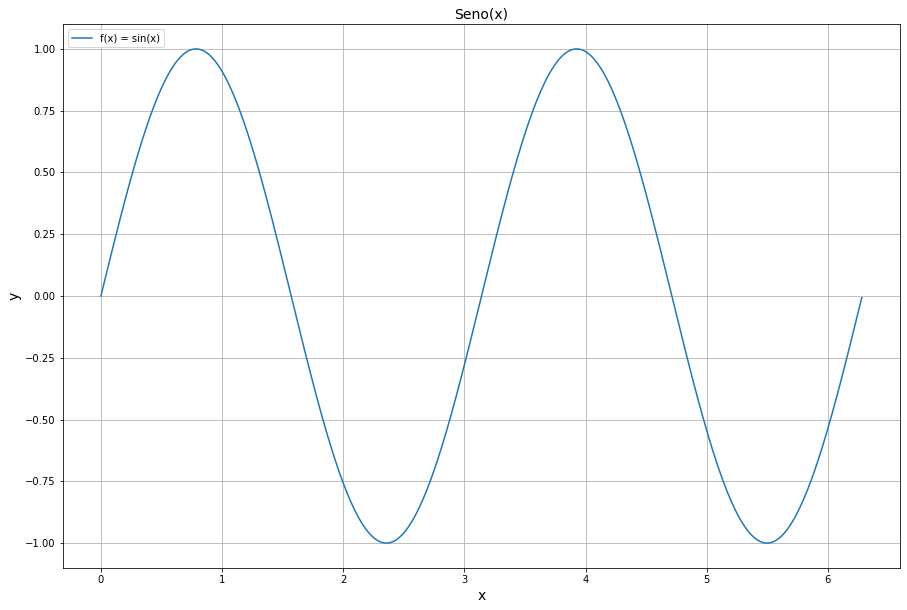

In [6]:
x = np.arange(0, 2*np.pi, 0.01)
y = np.sin(2*x)
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(x, y, label="f(x) = sin(x)")
ax.set_xlabel('x',fontsize=14)   #legenda dos eixos
ax.set_ylabel('y',fontsize=14)
ax.set_title('Seno(x)',fontsize=14) #titulo
ax.legend(loc='upper left')      #gera a legenda e dá a posição
ax.grid(True)                     #coloca o grid de linhas 
plt.show() 

Tipo do objeto:  <class 'numpy.ndarray'>
Tamanho da imagem:  (256, 256)
Tip de dado:  uint8
Minimo = 7 Maximo = 253


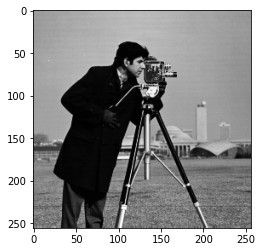

In [7]:
img = plt.imread('Imgs/cameraman.tiff')
print('Tipo do objeto: ', type(img))
print('Tamanho da imagem: ', img.shape)
print('Tip de dado: ', img.dtype)
print(f'Minimo = {img.min()} Maximo = {img.max()}')

plt.imshow(img, cmap='gray')

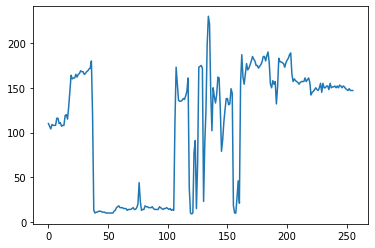

In [8]:
plt.plot(img[150])

#### Extração de negativo com loops

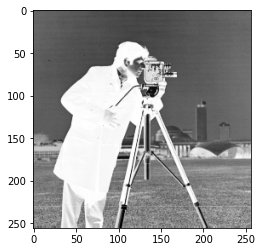

In [9]:
num_lins, num_cols = img.shape
img_transf = np.zeros((num_lins, num_cols), dtype=np.uint8) 

for row in range(num_lins):
  for col in range(num_cols):
    img_transf[row, col] = 255 -img[row, col] # Inverter os valores de cada pixel
    
plt.imshow(img_transf, cmap='gray')

#### Extração de negativo com numpy

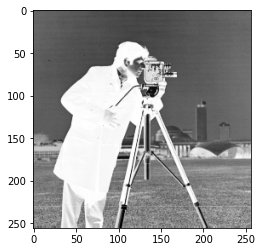

In [10]:
img_transf = 255 - img
plt.imshow(img_transf, cmap='gray')

#### Transformação logaritma com loops

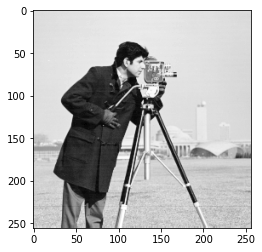

In [11]:
# Transformacao Logaritma
c = 255 / np.log(256) # Constante da formula
for row in range(num_lins):
  for col in range(num_cols):
    img_transf[row, col] = c * np.log(1 + img[row, col]) # Inverter os valores de cada pixel
    
plt.imshow(img_transf, cmap='gray')

#### Comportamento da função logaritma nas imagens

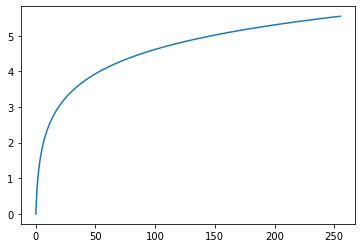

In [12]:
x = np.arange(0, 256)
y = np.log(1 + x)
plt.plot(x, y)

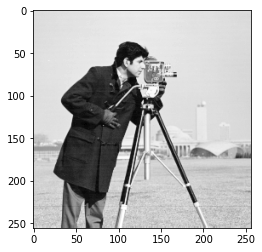

In [13]:
c = 255 / np.log(256)
lookup_table = np.zeros(256)
for value in range(0, 256):
  lookup_table[value] = int(c*np.log(1 + value))
lookup_table

for row in range(num_lins):
  for col in range(num_cols):
    img_transf[row, col] = lookup_table[img[row, col]]
plt.imshow(img_transf, cmap='gray')

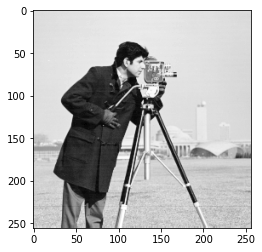

In [16]:
# Transformação usando indexação do numpy
img_log = lookup_table[img.flatten()].reshape(img.shape)
plt.imshow(img_log, 'gray')

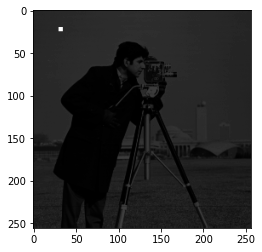

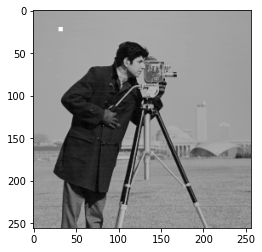

In [15]:
# Simulando uma situação na qual o logaritmo seria util
img_sim = img.astype(float)
img_sim[20:25, 30:35] = 1000
plt.imshow(img_sim, 'gray')
img_sim_log = np.log(img_sim)
plt.figure()
plt.imshow(img_sim_log, 'gray')

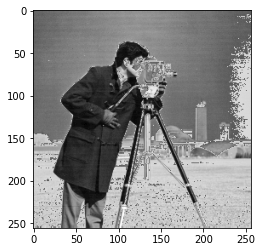

In [14]:
for row in range(num_lins):
  for col in range(num_cols):
    if img[row, col] < 150:
      img_transf[row, col] = lookup_table[img[row, col]]
    else: 
      img_transf[row, col] = img[row, col]
      
plt.imshow(img_transf, cmap='gray')